In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/Flight_Booking.csv')
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [4]:
df.drop(columns='Unnamed: 0', inplace=True)

In [5]:
cat_cols = df.select_dtypes(include='object')
num_cols = df.select_dtypes(include=['int','float'])
for i in cat_cols:
  print(f"The column name:{i} \n{df[i].value_counts()} \n\n")

The column name:airline 
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64 


The column name:flight 
UK-706     3235
UK-772     2741
UK-720     2650
UK-836     2542
UK-822     2468
           ... 
SG-9923       1
6E-6474       1
6E-865        1
G8-705        1
G8-107        1
Name: flight, Length: 1561, dtype: int64 


The column name:source_city 
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: source_city, dtype: int64 


The column name:departure_time 
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: departure_time, dtype: int64 


The column name:stops 
one            250863
zero            36004
two_or_more     13286
Name: stops, dtype: int64 


The column name:arrival_time 
Night            91538
Evening          78323


In [6]:
df.drop(columns='flight',inplace=True)

In [7]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


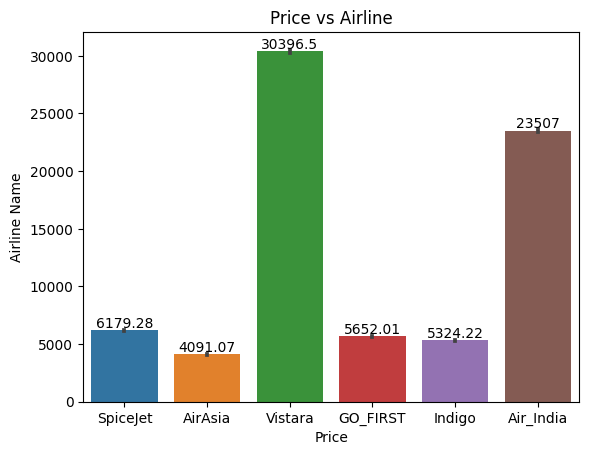

In [8]:
ax = sns.barplot(y=df.price,x=df.airline)
ax.bar_label(ax.containers[0])
plt.xlabel('Price')
plt.ylabel('Airline Name')
plt.title('Price vs Airline')
plt.show()

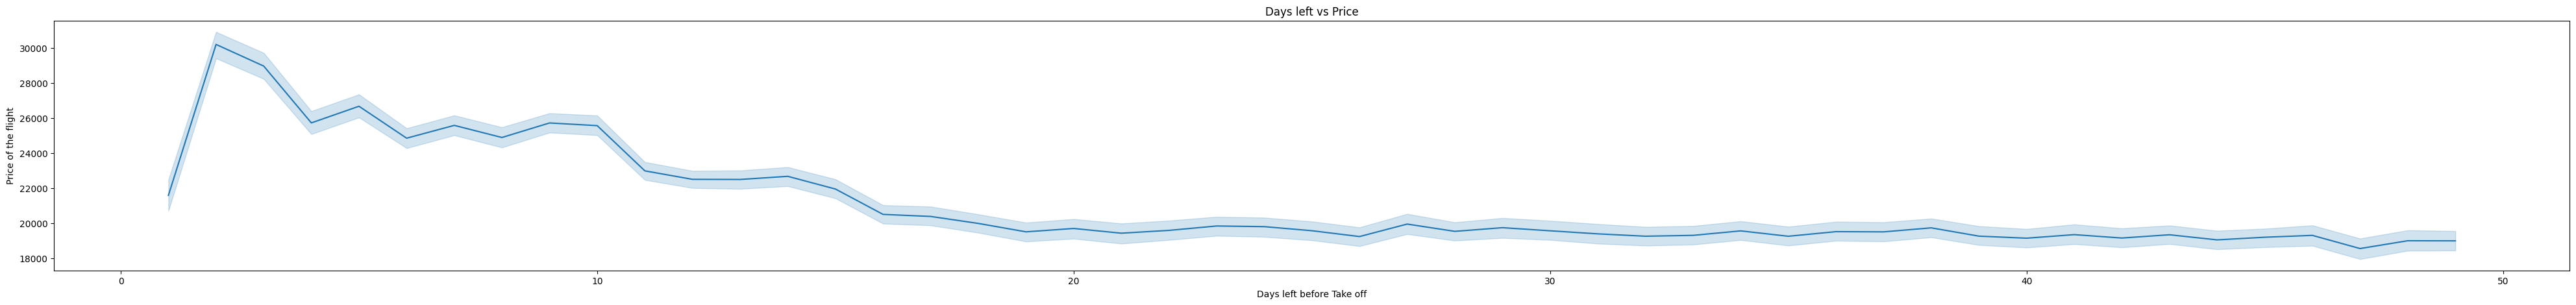

In [9]:
plt.figure(figsize=(50,5))
sns.lineplot(x=df.days_left, y=df.price)
plt.xlabel('Days left before Take off')
plt.ylabel('Price of the flight')
plt.title('Days left vs Price')
plt.show()

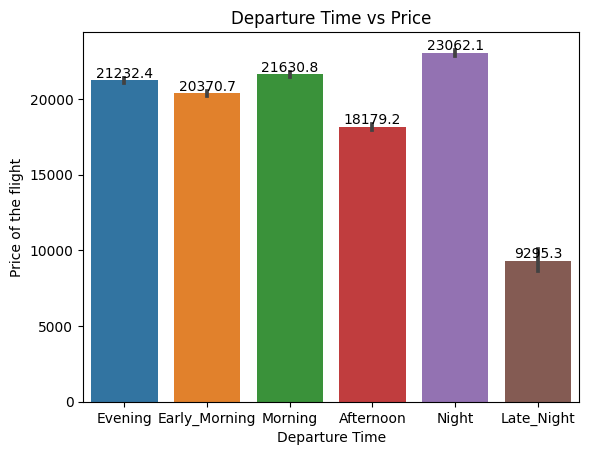

In [10]:
ax = sns.barplot(x=df.departure_time, y=df.price)
plt.bar_label(ax.containers[0])
plt.xlabel('Departure Time')
plt.ylabel('Price of the flight')
plt.title('Departure Time vs Price')
plt.show()

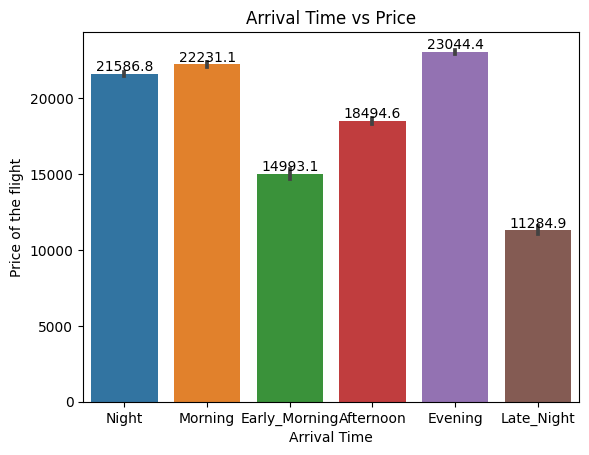

In [11]:
ax = sns.barplot(x=df.arrival_time, y=df.price)
ax.bar_label(ax.containers[0])
plt.xlabel('Arrival Time')
plt.ylabel('Price of the flight')
plt.title('Arrival Time vs Price')
plt.show()

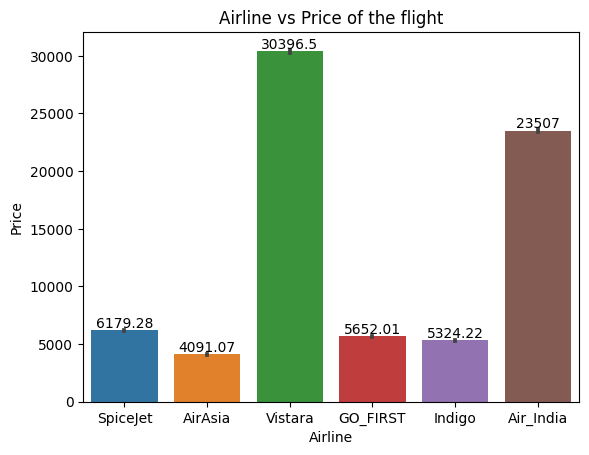

In [12]:
ax = sns.barplot(x=df.airline,y=df.price)
ax.bar_label(ax.containers[0])
plt.xlabel('Airline')
plt.ylabel('Price')
plt.title('Airline vs Price of the flight')
plt.show()

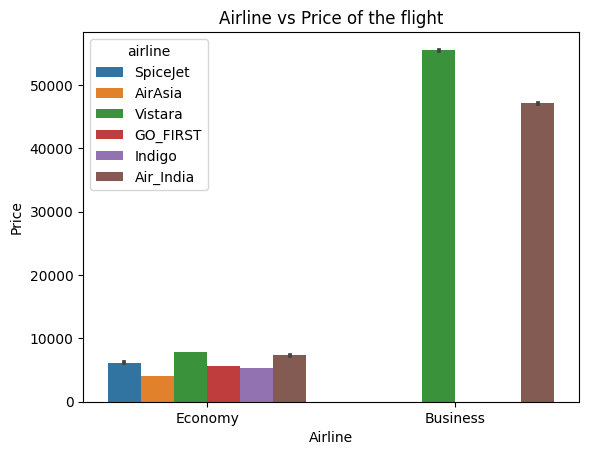

In [13]:
sns.barplot(x=df['class'],y=df.price,hue=df.airline)
plt.xlabel('Airline')
plt.ylabel('Price')
plt.title('Airline vs Price of the flight')
plt.show()

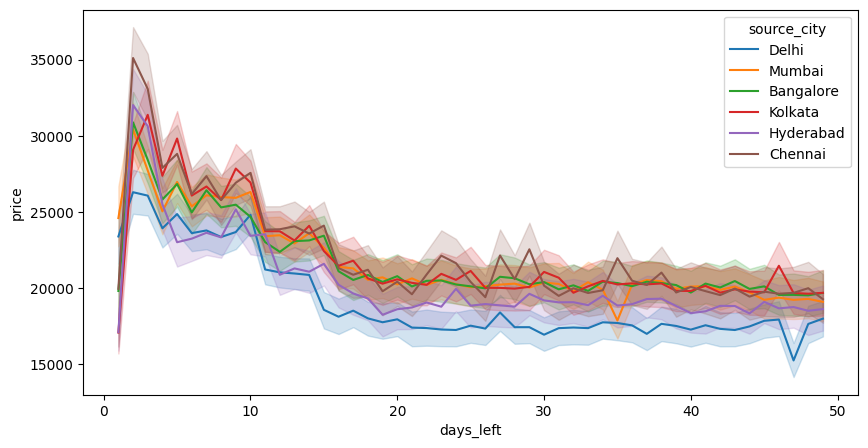

In [14]:
plt.figure(figsize=(10,5))
sns.lineplot(x=df.days_left, y=df.price,hue=df.source_city)
plt.show()

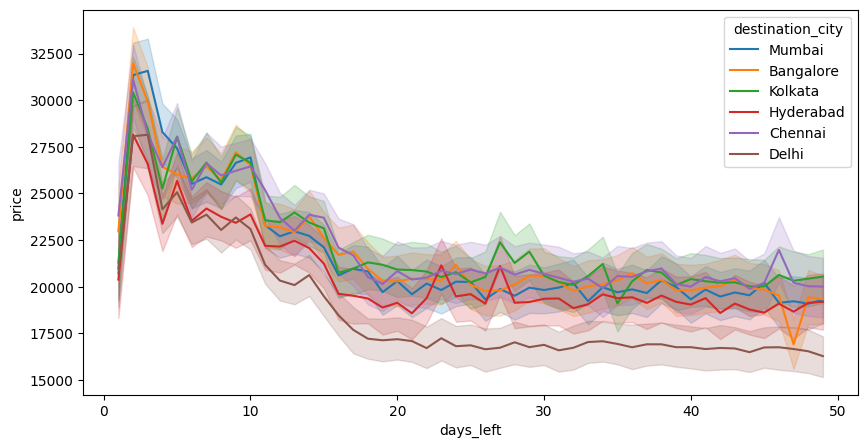

In [15]:
plt.figure(figsize=(10,5))
sns.lineplot(x=df.days_left, y=df.price,hue=df.destination_city)
plt.show()

In [16]:
from sklearn.preprocessing import LabelEncoder

cat_cols = df.select_dtypes(include='object')

lr = LabelEncoder()
for i in cat_cols:
  df[i] = lr.fit_transform(df[i])

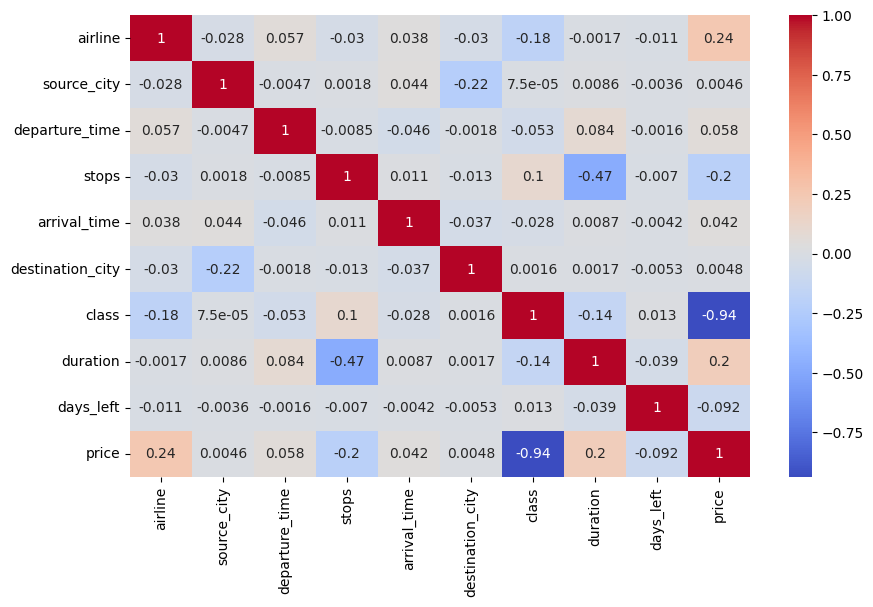

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

In [18]:
X = df.drop(columns='price')
y = df.price

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Attribute'] = X.columns
vif["Vif_value"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif

,Attribute,Vif_value
0,airline,3.393124
1,source_city,2.927766
2,departure_time,2.779427
3,stops,1.426614
4,arrival_time,3.684550
5,destination_city,2.885337
6,class,2.849370
7,duration,4.113876
8,days_left,3.976790


In [20]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

print(f"r2_score = {r2_score(y_test ,y_pred)}")
print(f"mean_absolute_error = {mean_absolute_error(y_test ,y_pred)}")
print(f"mean_absolute_percentage_error = {mean_absolute_percentage_error(y_test ,y_pred)}")
print(f"mean_squared_error = {mean_squared_error(y_test ,y_pred)}")

r2_score = 0.9047635108490827
mean_absolute_error = 4624.72223853634
mean_absolute_percentage_error = 0.4363854632863268
mean_squared_error = 49105649.45047114


In [22]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
y_pred = dtr.predict(x_test)

print(f"r2_score = {r2_score(y_test ,y_pred)}")
print(f"mean_absolute_error = {mean_absolute_error(y_test ,y_pred)}")
print(f"mean_absolute_percentage_error = {mean_absolute_percentage_error(y_test ,y_pred)}")
print(f"mean_squared_error = {mean_squared_error(y_test ,y_pred)}")

r2_score = 0.9755399220980413
mean_absolute_error = 1178.5725067409394
mean_absolute_percentage_error = 0.07549532472481314
mean_squared_error = 12612056.803998958


In [23]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

dtr = DecisionTreeRegressor()
cross = cross_validate(dtr, x_train,y_train, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
dtr.fit(x_train,y_train)
y_pred = dtr.predict(x_test)

print(f"r2_score = {r2_score(y_test ,y_pred)}")
print(f"mean_absolute_error = {mean_absolute_error(y_test ,y_pred)}")
print(f"mean_absolute_percentage_error = {mean_absolute_percentage_error(y_test ,y_pred)}")
print(f"mean_squared_error = {mean_squared_error(y_test ,y_pred)}")

r2_score = 0.9755958778633207
mean_absolute_error = 1176.66315293825
mean_absolute_percentage_error = 0.07547667439470757
mean_squared_error = 12583205.003401935


In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
y_pred = rfr.predict(x_test)

print(f"r2_score = {r2_score(y_test ,y_pred)}")
print(f"mean_absolute_error = {mean_absolute_error(y_test ,y_pred)}")
print(f"mean_absolute_percentage_error = {mean_absolute_percentage_error(y_test ,y_pred)}")
print(f"mean_squared_error = {mean_squared_error(y_test ,y_pred)}")

r2_score = 0.984720827355631
mean_absolute_error = 1099.4485811142083
mean_absolute_percentage_error = 0.07184231906744569
mean_squared_error = 7878216.663138967


In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

rfr = RandomForestRegressor()
cross = cross_validate(rfr, x_train,y_train, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
rfr.fit(x_train,y_train)
y_pred = rfr.predict(x_test)

print(f"r2_score = {r2_score(y_test ,y_pred)}")
print(f"mean_absolute_error = {mean_absolute_error(y_test ,y_pred)}")
print(f"mean_absolute_percentage_error = {mean_absolute_percentage_error(y_test ,y_pred)}")
print(f"mean_squared_error = {mean_squared_error(y_test ,y_pred)}")

r2_score = 0.9847291468016861
mean_absolute_error = 1100.6840338571562
mean_absolute_percentage_error = 0.07184685657145011
mean_squared_error = 7873927.006881754
